# Lab 1 Analysis Example using Thicket

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
tk = th.Thicket.from_caliperreader(glob("*.cali"))

In [3]:
# Performance data
tk.dataframe
tk.statsframe.dataframe["time"] = 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 comm_large
│  └─ 1.000 comm_small
│     ├─ 1.000 MPI_Recv
│     └─ 1.000 MPI_Send
├─ 1.000 comp
│  ├─ 1.000 comp_large
│  └─ 1.000 comp_small
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [4]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,min,max,average,variance,total,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
545941191,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s1-p8-a2.cali,true,1700038846,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 8, 1]",c,Bubble/Odd-Even Sort,0.015220,0.020863,0.018041,0.000008,0.036083,MPI,float,4,8,Random,2,0,0,20,"All 3, Online, AI, and Handwritten"
2035823270,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s1-p64-a2.cali,true,1700038867,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bubble, 64, 1]",c,Bubble/Odd-Even Sort,0.017121,0.019538,0.018330,0.000001,0.036659,MPI,float,4,64,Random,2,0,0,20,"All 3, Online, AI, and Handwritten"


In [5]:
gb = tk.groupby("num_procs")

1  thickets created...
{2: <thicket.thicket.Thicket object at 0x2b496bc16cd0>}


Compose these 3 groups column-wise to get a holistic view of the data

In [6]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="InputSize"
)

In [7]:
ctk.dataframe

2  \
                                                            nid   
node                                              InputSize       
{'name': 'main', 'type': 'function'}              8           1   
                                                  64          1   
{'name': 'comm', 'type': 'function'}              8           5   
                                                  64          5   
{'name': 'comm_large', 'type': 'function'}        8          10   
                                                  64         10   
{'name': 'comm_small', 'type': 'function'}        8           6   
                                                  64          6   
{'name': 'MPI_Recv', 'type': 'function'}          8           8   
                                                  64          8   
{'name': 'MPI_Send', 'type': 'function'}          8           7   
                                                  64          7   
{'name': 'comp', 'type': 'function'}              8           3   
                                                  64          3   
{'name': 'comp_large', 'type': 'function'}        8           4   
                                                  64          4   
{'name': 'comp_small', 'type': 'function'}        8           9   
                                                  64          9   
{'name': 'correctness_check', 'type': 'function'} 8          11   
                                                  64         11   
{'name': 'data_init', 'type': 'function'}         8           2   
                                                  64          2   

                                                                            \
                                                              spot.channel   
node                                              InputSize                  
{'name': 'main', 'type': 'function'}              8          regionprofile   
                                                  64         regionprofile   
{'name': 'comm', 'type': 'function'}              8          regionprofile   
                                                  64         regionprofile   
{'name': 'comm_large', 'type': 'function'}        8          regionprofile   
                                                  64         regionprofile   
{'name': 'comm_small', 'type': 'function'}        8          regionprofile   
                                                  64         regionprofile   
{'name': 'MPI_Recv', 'type': 'function'}          8          regionprofile   
                                                  64         regionprofile   
{'name': 'MPI_Send', 'type': 'function'}          8          regionprofile   
                                                  64         regionprofile   
{'name': 'comp', 'type': 'function'}              8          regionprofile   
                                                  64         regionprofile   
{'name': 'comp_large', 'type': 'function'}        8          regionprofile   
                                                  64         regionprofile   
{'name': 'comp_small', 'type': 'function'}        8          regionprofile   
                                                  64         regionprofile   
{'name': 'correctness_check', 'type': 'function'} 8          regionprofile   
                                                  64         regionprofile   
{'name': 'data_init', 'type': 'function'}         8          regionprofile   
                                                  64         regionprofile   

                                                                           \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              8              0.451593   
                                                  64             0.448587   
{'name': 'comm', 'type': 'function'}              

Perform pandas operations to get the table in a desirable format for plotting

In [8]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (2, "nid"), (2, "spot.channel")], axis=1)
# Rename index to remove tuple
#ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("threads", ""): "threads"}).set_index(["name", "threads"])
# Drop "time" label as it is redundant
#ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [9]:
ctk.dataframe

InputSize             2                                         \
             Min time/rank Max time/rank Avg time/rank Total time   
0          8      0.451593      0.460406      0.455999   0.911999   
1         64      0.448587      0.455792      0.452189   0.904379   
2          8      0.009744      0.013414      0.011579   0.023158   
3         64      0.009316      0.014191      0.011753   0.023507   
4          8      0.000082      0.000107      0.000095   0.000189   
5         64      0.000068      0.000079      0.000074   0.000147   
6          8      0.009617      0.013313      0.011465   0.022931   
7         64      0.009218      0.014104      0.011661   0.023322   
8          8      0.009552      0.013237      0.011394   0.022789   
9         64      0.009147      0.014031      0.011589   0.023179   
10         8      0.000041      0.000046      0.000044   0.000088   
11        64      0.000038      0.000043      0.000040   0.000080   
12         8      0.000043      0.000045      0.000044   0.000088   
13        64      0.000050      0.000050      0.000050   0.000100   
14         8      0.000006      0.000006      0.000006   0.000013   
15        64      0.000011      0.000012      0.000012   0.000024   
16         8      0.000012      0.000013      0.000013   0.000025   
17        64      0.000013      0.000015      0.000014   0.000027   
18         8      0.000202      0.000202      0.000202   0.000202   
19        64      0.000033      0.000033      0.000033   0.000033   
20         8      0.000039      0.000045      0.000042   0.000083   
21        64      0.000035      0.000042      0.000039   0.000078   

                                    name  
   Variance time/rank                     
0            0.000019               main  
1            0.000013               main  
2            0.000003               comm  
3            0.000006               comm  
4            0.000000         comm_large  
5            0.000000         comm_large  
6            0.000003         comm_small  
7            0.000006         comm_small  
8            0.000003           MPI_Recv  
9            0.000006           MPI_Recv  
10           0.000000           MPI_Send  
11           0.000000           MPI_Send  
12           0.000000               comp  
13           0.000000               comp  
14           0.000000         comp_large  
15           0.000000         comp_large  
16           0.000000         comp_small  
17           0.000000         comp_small  
18           0.000000  correctness_check  
19           0.000000  correctness_check  
20           0.000000          data_init  
21           0.000000          data_init

In [10]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("inputSize"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

KeyError: 'Requested level (name) does not match index name (None)'

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [11]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [12]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [13]:
ctk.dataframe.loc["main"]

,128,1024,4096
threads,,,
1,0.000270,0.000257,0.000367
2,0.000247,0.000284,0.000406
4,0.000256,0.000260,0.000374
8,0.000241,0.000278,0.000357
16,0.000262,0.000284,0.000356
32,0.000264,0.000264,0.000373
64,0.000256,0.000284,0.000453
96,0.000253,0.000305,0.000417
128,0.000287,0.000284,0.000414


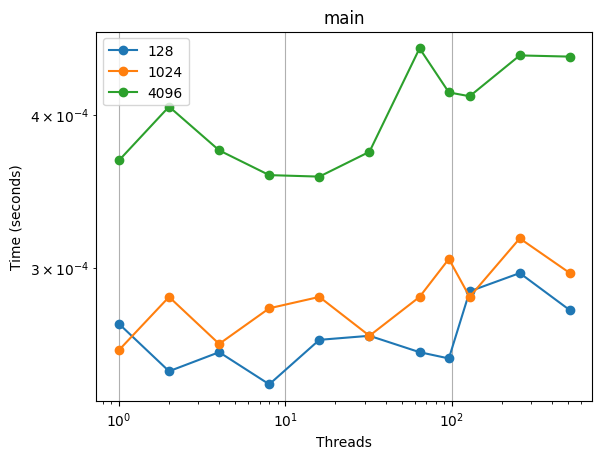

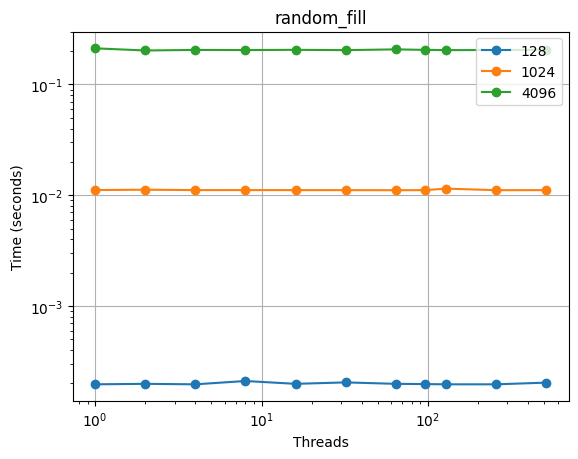

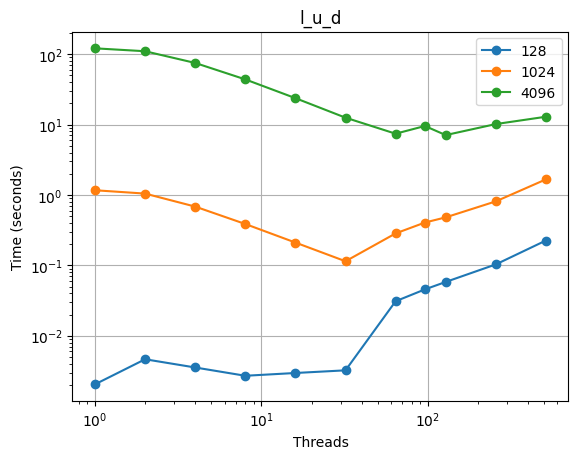

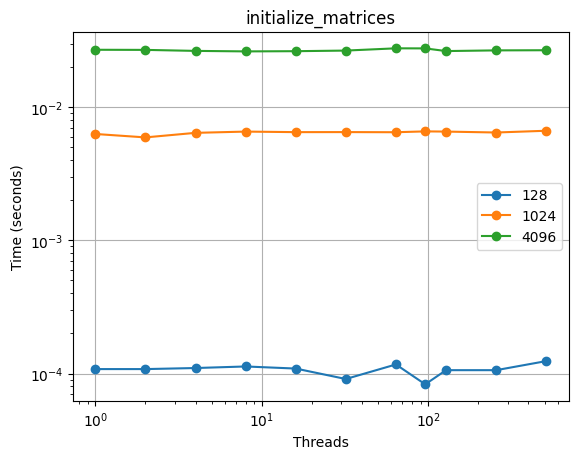

In [14]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

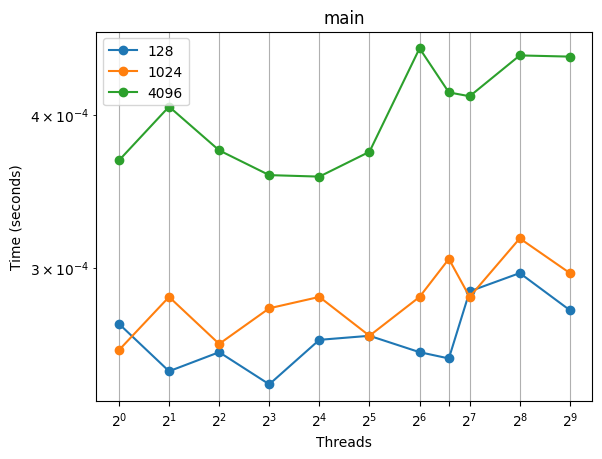

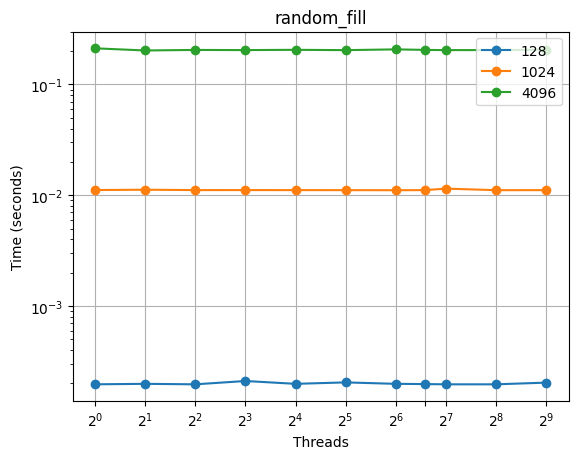

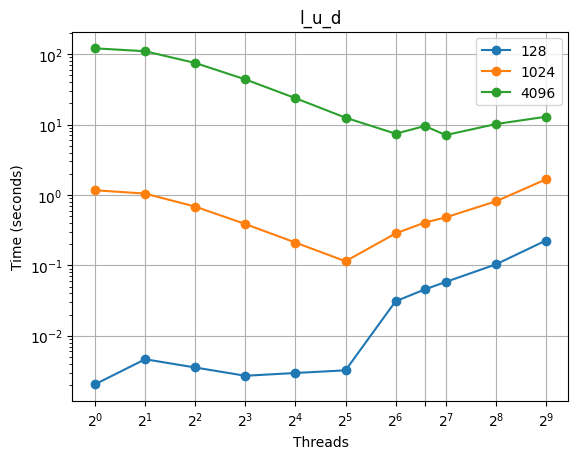

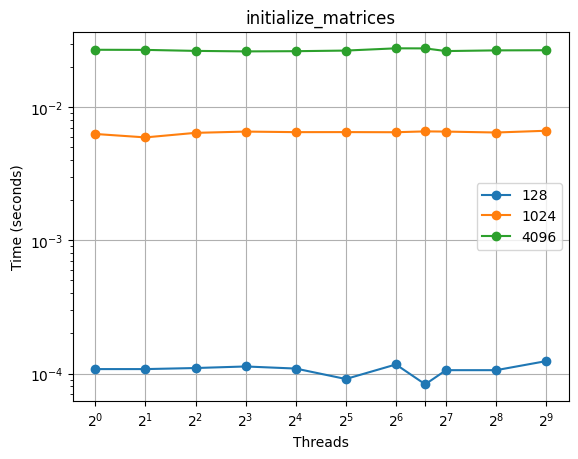

In [15]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
    )

## Speedup

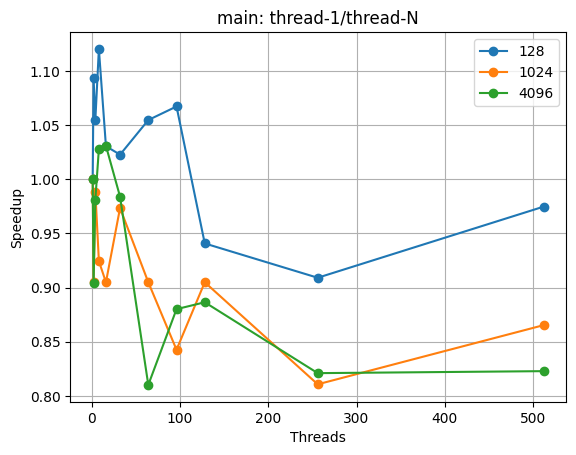

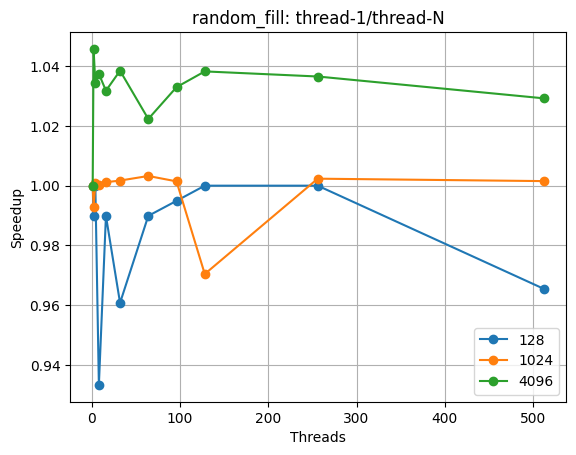

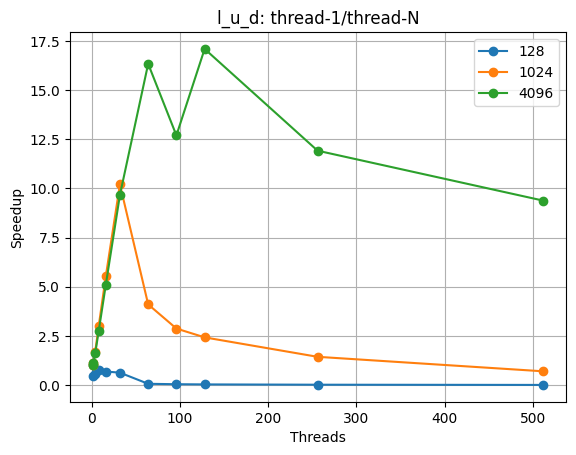

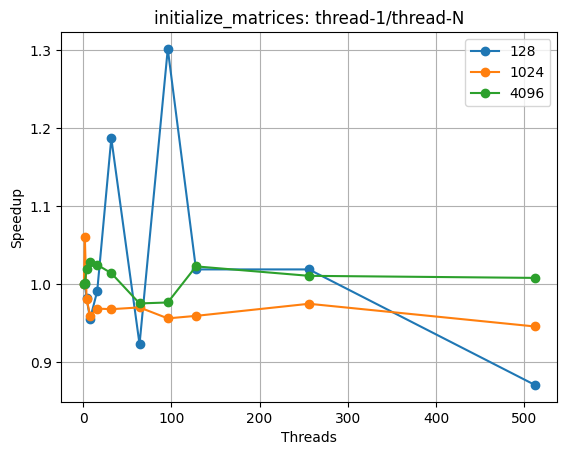

In [16]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )